In [57]:
import pymongo
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from classifier import classifier
import seaborn as sns

In [15]:
# connect to MongoDB
conn = "mongodb://localhost:27017"
client = pymongo.MongoClient(conn)
db = client.twitter_db

In [16]:
# create dataframe
df = pd.DataFrame(list(db.cheesecake_factory.find()))
df.head()

,_id,search_term,date_posted,original_tweet,clean_tokenized_tweet,num_of_favorites,num_of_replies,num_retweets
0,5f4e95072d91818a56b31134,cheesecake factory,2019-01-27 23:54:08,breaking down in the middle of the cheesecake ...,"[break, down, in, the, middle, of, the, cheese...",0,0,0
1,5f4e95072d91818a56b31135,cheesecake factory,2019-01-27 23:47:59,Oooweee that fresh banana cheesecake from the ...,"[oooweee, that, fresh, banana, cheesecake, fro...",0,0,0
2,5f4e95072d91818a56b31136,cheesecake factory,2019-01-27 23:43:43,The discovery that Cheesecake Factory delivers...,"[the, discovery, that, cheesecake, factory, de...",7,1,0
3,5f4e95072d91818a56b31137,cheesecake factory,2019-01-27 23:40:33,Happy 20th birthday to my Lil'Rog!!! Love U!!!...,"[happy, birthday, to, my, lil'rog, love, u, 😍😍...",0,0,0
4,5f4e95072d91818a56b31138,cheesecake factory,2019-01-27 23:38:12,IM AT THE CHEESECAKE FACTORY AND MY MIND IS BL...,"[im, at, the, cheesecake, factory, and, my, mi...",0,0,0


### Classifying all Tweets in dataset

In [17]:
tokenized_tweets = df["clean_tokenized_tweet"]
positive_count = 0
negative_count = 0

for tweet in tokenized_tweets:
    result = classifier.classify(dict([token, True] for token in tweet))
    if result == "Negative":
        negative_count += 1
    elif result == "Positive":
        positive_count += 1
    else:
        print(result)
        other_count += 1

print(f"Positive: {positive_count}")
print(f"Negative: {negative_count}")

Positive: 42293
Negative: 20901


### Classifying specific months of tweets

In [18]:
# searching for matching dates
def classify_monthly(search_month, search_year):
    # find dates in DB that match search month
    dates = []
    for date in df["date_posted"]:
        if (date.month == search_month) and (date.year == search_year):
            dates.append(date) 

    # collecting monthly data from DF
    month_rows = []
    for index, row in df.iterrows():
        if row["date_posted"] in dates:
            month_rows.append(row) 

    # classifying tweets
    month_positive_count = 0
    month_negative_count = 0
    month_other_count = 0
    for row in month_rows:
        result = classifier.classify(dict([token, True] for token in row["clean_tokenized_tweet"]))
        if result == "Negative":
            month_negative_count += 1
        elif result == "Positive":
            month_positive_count += 1
        else:
            print(result)
            month_other_count += 1
    
    print("-"*15)
    print(f"Month: {search_month}")
    print(f"Positive: {month_positive_count}")
    print(f"Negative: {month_negative_count}")
    print(f"Other: {month_other_count}")
    print("-"*15)
    
    return month_positive_count, month_negative_count, month_other_count

In [28]:
# define month to search for (1-12)

search_months = [1,2,3,4,5,6,7,8]
year = 2020

positive_list = []
negative_list = []
other_list = []
year_total_pos = 0
year_total_neg = 0
year_total_oth = 0

for month in search_months:
    total_pos = 0
    total_neg = 0
    total_other = 0
    
    pos, neg, oth = classify_monthly(month, year)
    total_pos = total_pos + pos
    total_neg = total_neg + neg
    total_other = total_other + oth
    
    positive_list.append(total_pos)
    negative_list.append(total_neg)
    other_list.append(total_other)
    
    year_total_pos = year_total_pos + pos
    year_total_neg = year_total_neg + neg
    year_total_oth = year_total_oth + oth
    
print(f"Total Positive: {year_total_pos}")
print(f"Total Negative: {year_total_neg}")
print(f"Total Other: {total_other}")

---------------
Month: 1
Positive: 3298
Negative: 1702
Other: 0
---------------
---------------
Month: 2
Positive: 3464
Negative: 1536
Other: 0
---------------
---------------
Month: 3
Positive: 2895
Negative: 2105
Other: 0
---------------
---------------
Month: 4
Positive: 3135
Negative: 1865
Other: 0
---------------
---------------
Month: 5
Positive: 3249
Negative: 1751
Other: 0
---------------
---------------
Month: 6
Positive: 3366
Negative: 1634
Other: 0
---------------
---------------
Month: 7
Positive: 3316
Negative: 1684
Other: 0
---------------
---------------
Month: 8
Positive: 3314
Negative: 1686
Other: 0
---------------
Total Positive: 26037
Total Negative: 13963
Total Other: 0


In [29]:
positive_list

[3298, 3464, 2895, 3135, 3249, 3366, 3316, 3314]

In [30]:
negative_list

[1702, 1536, 2105, 1865, 1751, 1634, 1684, 1686]

### Plotting Sentiment Trends

#### Count of Positive and Negative Tweets Over Time

In [49]:
rcParams.keys()

NameError: name 'rcParams' is not defined

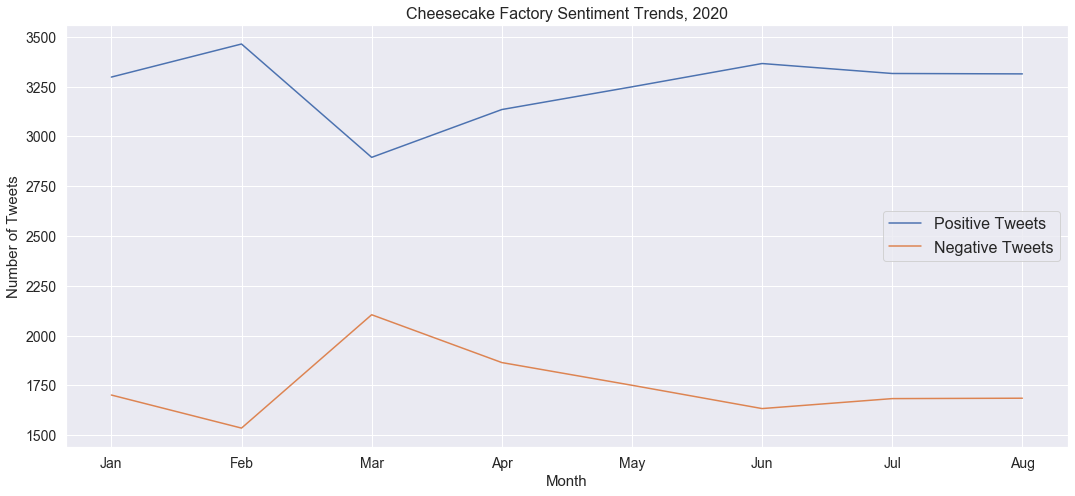

In [75]:
plt.figure(figsize=(15,7))
# x_values = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct","Nov", "Dec"]
# sns.set()
x_values = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]
plt.plot(x_values, positive_list, label="Positive Tweets")
plt.plot(x_values, negative_list, label="Negative Tweets")
plt.legend(loc="center right",prop={'size': 16})
plt.xlabel("Month", size=15)
plt.ylabel("Number of Tweets", size=15)
plt.title("Cheesecake Factory Sentiment Trends, 2020", size=16)
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("/Users/loganbon/Documents/GitHub/Projects/twitter-sentimate-analysis/Tweet and Eat/tweet & eat/static/images/sentiment_trends.png")

In [37]:
total = sum(positive_list+negative_list)
pos_value_pct = []

for value in positive_list:
    pos_pct = (value/total)*100
    pos_value_pct.append(pos_pct)
    
    
neg_total = sum(negative_list)
neg_value_pct = []

for value in negative_list:
    neg_pct = (value/total)*100
    neg_value_pct.append(neg_pct)

#### Percent of Positive and Negative Tweets

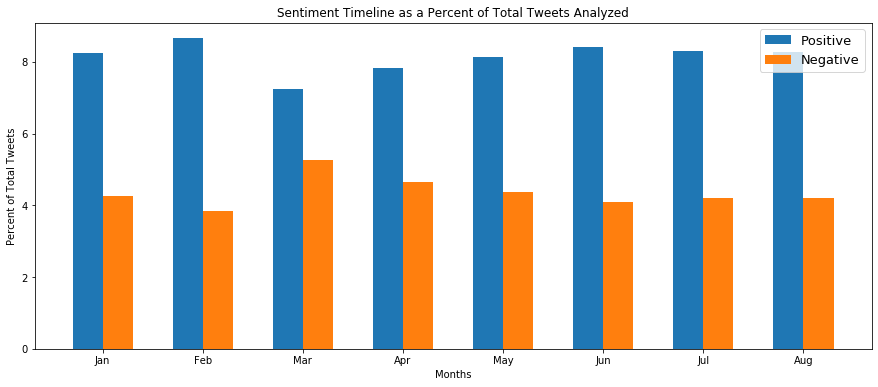

In [38]:
x_values = np.arange(8)
# labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct","Nov", "Dec"]
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]
width = 0.3
plt.figure(figsize=(15,6))
plt.bar(x_values, pos_value_pct , width, label="Positive")
plt.bar(x_values + width, neg_value_pct, width , label="Negative")
plt.xticks(x_values+width/2,labels)
plt.legend(loc="best",prop={'size': 13})
plt.ylabel("Percent of Total Tweets")
plt.xlabel("Months")
plt.title("Sentiment Timeline as a Percent of Total Tweets Analyzed")
plt.show()

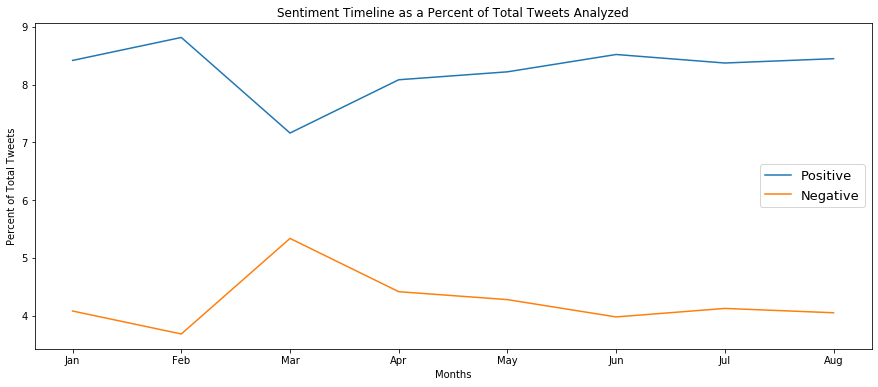

In [33]:
# x_values = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct","Nov", "Dec"]
x_values = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]
plt.figure(figsize=(15,6))
plt.plot(x_values, pos_value_pct, label="Positive")
plt.plot(x_values, neg_value_pct, label="Negative")
plt.legend(loc="best",prop={'size': 13})
plt.ylabel("Percent of Total Tweets")
plt.xlabel("Months")
plt.title("Sentiment Timeline as a Percent of Total Tweets Analyzed")
plt.show()